In [35]:
from scipy.integrate import odeint
from random import random

import numpy as np
import matplotlib.pyplot as plt

In [36]:
def plotseird(t, S, E, I, R, D, L=None, R0=None):
    fp, axp = plt.subplots(1,1,figsize=(10,4))
    #axp.plot(t, S, 'b', linewidth=2, label='Suceptibles')
    axp.plot(t, E, 'y', linewidth=2, label='Expuestos')
    axp.plot(t, I, 'r', linewidth=2, label='Infectados')
    axp.plot(t, R, 'g', linewidth=2, label='Recuperados')
    axp.plot(t, D, 'k', linewidth=2, label='Muertos')
    axp.set_xlabel('Tiempo (dias)')
    legend = axp.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    if L is not None:
        plt.title("Encierro en el día {} ".format(L))
    plt.show()

    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, E, 'y', linewidth=2, label='Expuestos')
    ax.plot(t, I, 'r', linewidth=2, label='Infectados')
    ax.plot(t, R, 'g', linewidth=2, label='Recuperados')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Muertos')
    ax.set_xlabel('Tiempo (dias)')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    plt.show()

    """
    f1 = plt.figure(figsize=(12,4))
    f1p, ax0 = plt.subplots(1,1,figsize=(10,4))
    ax0.plot(t, S, 'b', linewidth=2, label='Susceptible')
    ax.set_xlabel('Tiempo (dias)')
    legend = ax0.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    plt.show()
    """

    f2 = plt.figure(figsize=(12,4))
    f2p, ax1 = plt.subplots(1,1,figsize=(10,4))
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R0')

    ax1.set_xlabel('Tiempo (dias)')
    ax1.title.set_text('R0 con el tiempo')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show()

In [37]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    Z = random()
    S, E, I, R, D = y
    dSdt = (-beta(t) * S * I / N ) * Z
    dEdt = (beta(t) * S * I / N - delta * E ) * Z
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


def data_time(t, data):
    print(data[t])
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = ('Expuestos', 'Infectados', 'Recuperados', 'Muertos')
    datos = data[t]
    sizes = datos[1:]
    explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [40]:
N = 6220145
# total population ZMG
# Source: https://www.jalisco.gob.mx/es/jalisco/guadalajara
# In 2015, total population was 4'434,878 people
# The growth rate has been creasing by 7%
# Following that rate, by 2020 the total population is
# ZMG population by 2020: 6'220,145

d = 10
# number of days an infected person has and can spread the disease
# Source: World Health Organization
# https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_4#:~:text=The%20incubation%20period%20for%20COVID,occur%20before%20symptom%20onset.
# "The incubation period for COVID-19, which is the time between exposure to the virus (becoming infected) and
# symptom onset, is on average 5-6 days, however can be up to 14 days."
#
# Taking as consideration of time when a person realize that has the virus
# and put his/her self in quarentine, we've decided the average between
# average and worst case 6 and 14 days.


gamma = 1.0 / d
# proportion of infected recovering per day


delta = 1.0 / 6
# incubation period of n days
# taking as average of incubation time, we've decided 6 days


R_0 = 1.2
R_0_start, k, x0, R_0_end = 2.5, 0.2, 30, 0.8


def R_0(t):
    return 5 if t < L else 1.2


def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end


# total number of people an infected person infects
# based on Study of 
#    - SoCieDat
#    - ZapopanLab
#    - Data Science Monterrey
#    - Datlab Community
# Taking the average they give between .8 and 1.5 of range.
# Source: https://datoscovid.mx/


def beta(t):
    return logistic_R_0(t) * gamma
# expected amount of people an infected person infects per day

casos_zmg = {
    "confirmados": 1238,
    "sospechosos": 462,
    "descartados": 9037,
    "defunciones": 116
}
casos_total = sum(casos_zmg.values())
alpha = casos_zmg["defunciones"]/casos_total
alpha = .096733
# death rate
# Source: https://ssj.jalisco.gob.mx/prensa/noticia/9037
# Date: May 25 (latest)

days = 11
days = 10.5844
rho = 1/days
# days from infection until death
# source: South Corea editorial Dong-A Ilbo's research

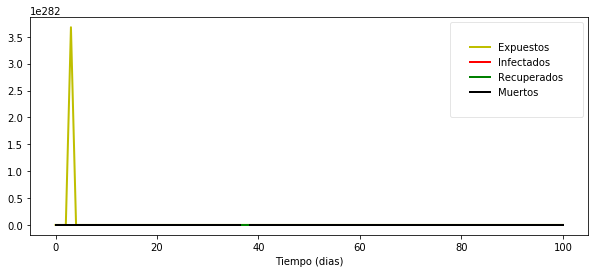

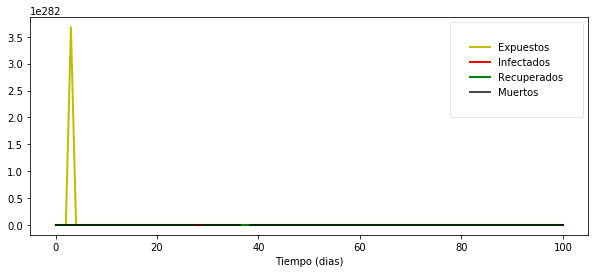

<Figure size 864x288 with 0 Axes>

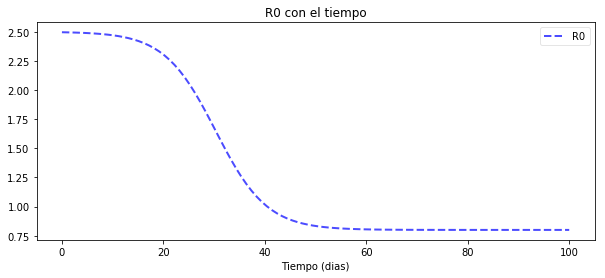

In [41]:
S0, E0, I0, R0, D0 = N-7, 5, 2, 0, 0  # initial conditions
L =30

t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]

plotseird(t, S, E, I, R, D, R0=R0_over_time)
#data_time(30,ret)

In [42]:
#t, S, E, I, R, D, R0=R0_over_time
from pprint import pprint

In [43]:
pprint(t)

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [44]:
pprint(S)

array([ 6.22013800e+006,  6.22013800e+006,  7.08643273e-304,
        2.19055195e-314,  2.28283780e-314, -6.02477662e+223,
        2.19055203e-314,  2.30492473e-314,  5.72729063e+040,
        2.19055211e-314,  2.30544795e-314,  6.40216221e+188,
        2.19055219e-314,  2.28283723e-314, -6.16303352e+036,
        2.19055227e-314,  2.30420142e-314, -2.07404159e+269,
        2.19055235e-314,  2.30557342e-314,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  6.94819926e-310,  4.94065646e-324,
        9.88131292e-324,  5.77068674e-321,  0.00000000e+000,
        2.28290280e-314,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  2.28290280e-314,  0.00000000e+000,
        1.27137913e-319,  0.00000000e+000,  0.00000000e+000,
        6.36600002e-314,  0.00000000e+000,  0.00000000e+000,
        6.36599876e-314,  0.00000000e+000,  0.00000000e+000,
        1.48539833e-313,

In [45]:
pprint(E)

array([ 5.00000000e+000,  4.99990366e+000,  1.88274910e-183,
        3.67654732e+282,  2.19055198e-314,  2.30420107e-314,
        2.74959050e-180,  2.19055206e-314,  2.28283868e-314,
       -6.55671444e+204,  2.19055214e-314,  2.30426855e-314,
        2.56417436e-275,  2.19055222e-314,  2.28283811e-314,
        7.19442838e-191,  2.19055230e-314,  2.30485583e-314,
       -7.52525195e-211,  2.19055238e-314,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  5.41495948e-321,
        1.28457068e-322,  1.48219694e-323,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        2.28290280e-314,  6.94819926e-310,  4.94065646e-324,
        0.00000000e+000,  2.12200844e-314,  0.00000000e+000,
        0.00000000e+000,  1.06099906e-313,  0.00000000e+000,
        0.00000000e+000,  1.06099903e-313,  9.88131292e-324,
        0.00000000e+000,

In [46]:
pprint(I)

array([ 2.00000000e+000,  2.00031633e+000,              nan,
        2.28283761e-314, -6.39406227e-077,  2.19055202e-314,
        2.30557389e-314, -5.62767717e+085,  2.19055209e-314,
        2.28283751e-314,  2.13434811e-027,  2.19055217e-314,
        2.30543018e-314,  4.84697009e-034,  2.19055225e-314,
        2.30426947e-314, -2.00872366e-091,  2.19055233e-314,
        2.30365606e-314,  4.46136081e-240,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  1.28457068e-322,  4.44659081e-323,
                    nan,  2.28290280e-314,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        2.28290280e-314,              nan,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  6.36600002e-314,
        0.00000000e+000,  0.00000000e+000,  4.24400297e-314,
        0.00000000e+000,  0.00000000e+000,  1.27319861e-313,
        1.97626258e-323,

In [47]:
pprint(R)

array([0.00000000e+000, 9.00883965e-005, 1.35854650e-219, 2.19055197e-314,
       2.30543065e-314, 2.07290543e+058, 2.19055205e-314, 2.30426966e-314,
       7.86067878e-285, 2.19055213e-314, 2.30475186e-314, 6.17515481e-188,
       2.19055221e-314, 2.30492486e-314, 1.57856084e-163, 2.19055228e-314,
       2.28283736e-314, 8.85178650e+011, 2.19055236e-314, 2.30492460e-314,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
                   nan, 2.28290280e-314, 2.30353833e-314, 6.94819926e-310,
       4.94065646e-324, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.77068674e-321, 1.28457068e-322, 6.57107309e-322, 3.03553933e-320,
       0.00000000e+000, 0.00000000e+000, 1.06099919e-313, 0.00000000e+000,
       0.00000000e+000, 8.48799455e-314, 0.00000000e+000, 0.00000000e+000,
       1.69759866e-313, 0.00000000e+000, 0.00000000e+000, 1.90979735e-313,
       2.47032823e-323, 0

In [48]:
pprint(D)

array([ 0.00000000e+000,  9.11509345e-006,  2.30420275e-314,
       -6.56442000e-001,  2.19055200e-314,  2.28283774e-314,
        1.03755536e-103,  2.19055208e-314,  2.28283872e-314,
        8.24950432e+066,  2.19055216e-314,  2.30492413e-314,
        5.99687104e+214,  2.19055224e-314,  2.30557364e-314,
       -1.00829344e-252,  2.19055232e-314,  2.28283726e-314,
       -6.07050490e+115,  2.19055240e-314,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        2.28290280e-314,  2.28290280e-314,  6.94819926e-310,
        2.12199579e-314,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        9.88131292e-324,              nan,  0.00000000e+000,
        0.00000000e+000,  4.24400423e-314,  0.00000000e+000,
        0.00000000e+000,  2.12200717e-314,  0.00000000e+000,
        0.00000000e+000,  8.48799581e-314,  0.00000000e+000,
        0.00000000e+000,

In [49]:
pprint(R0_over_time)

[2.4957965406337212,
 2.494868692247996,
 2.4937367921709592,
 2.4923563356264,
 2.4906732918709342,
 2.488622153428716,
 2.4861236290396285,
 2.4830819368262627,
 2.479381660526734,
 2.474884146121436,
 2.4694234430644446,
 2.462801839408578,
 2.454785110919328,
 2.445097710012634,
 2.4334182712455004,
 2.4193760155981368,
 2.402548900971923,
 2.3824646854163105,
 2.358606415960332,
 2.330424168496535,
 2.2973550325624,
 2.258853189669171,
 2.2144312547276717,
 2.163712610549589,
 2.10649213194833,
 2.042799583671008,
 1.972956617916941,
 1.8976157205838522,
 1.8177690221911684,
 1.7347177954312125,
 1.65,
 1.5652822045687875,
 1.4822309778088316,
 1.4023842794161476,
 1.3270433820830587,
 1.2572004163289918,
 1.19350786805167,
 1.136287389450411,
 1.0855687452723284,
 1.0411468103308292,
 1.0026449674376,
 0.9695758315034648,
 0.941393584039668,
 0.9175353145836896,
 0.8974510990280768,
 0.8806239844018635,
 0.8665817287544995,
 0.8549022899873658,
 0.845214889080672,
 0.837198160591

In [ ]:
"""
muertes = sum([ death for death in D ])
infectados = sum([ inf for inf in I ])
print(muertes)
print(infectados)

D1 = list(reversed(D))
Muertes = sum([ D1[idx] - D1[idx + 1] for idx in range(len(D) -1) ])
print(Muertes)
"""